In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn



### Step 1: Prepare data for the Linear Regression. We've added our own weight and bias so that we know the real value of weight and bias.

In [2]:
weight = 0.5
bias = 0.15

start =0
end =5
step = 0.02

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
X.shape

torch.Size([250, 1])

In [3]:
y = weight * X + bias
y.shape

torch.Size([250, 1])

In [4]:
train_split = int(len(X)*0.8)
train_split

200

### Step 2: Split the data X and y into training and testing split
1. 80% of the data is for training
2. 20% of the data is for testing
3. I didn't set the data for validation, in larger data sets we split data into 3 sets, [train, validation, test]: (60-70%, 10-20%, 20-30%)

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([200, 1]),
 torch.Size([200, 1]),
 torch.Size([50, 1]),
 torch.Size([50, 1]))

### Step 3: Visualize the model performance by plotting the graph.
- plot the graph before the prediction and after the prediction and you'll know how better your model is.

In [6]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.plot(X_train, y_train, c="b", label="Training data")
    plt.plot(X_test, y_test, c="g", label="Testing data")
    
    if predictions is not None:
        plt.plot(X_test, predictions, c="r", label="Predictions")
    
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Linear Regression Predictions")
    plt.show()


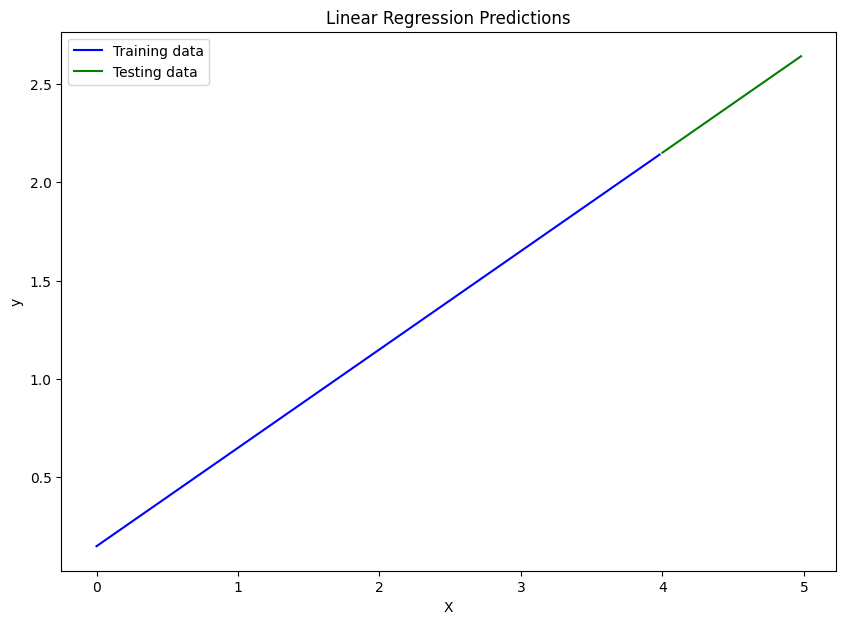

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

### Step 4: Setup LinearRegressionModel
- randomly initialize the value of weights and bias then gradually fix it using gradient descent.
- forward pass - forward pass means running the model from input layer to output layer serially.

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self,X):
        super().__init__()

        self.weight = nn.Parameter(
            torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float
                        ))

        self.bias = nn.Parameter(torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float,
                        ))

    def forward(self, X):
        return X * self.weight + self.bias

In [9]:
torch.manual_seed(42)

model = LinearRegressionModel(X_train)
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### inference_mode:
It makes require_grad=False and other things as well which speeds up the model testing and evaluation. In this we test the code. and while testing the code we don't do any calculation just analysis and evaluation.

In [11]:
with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[1.4756],
        [1.4823],
        [1.4890],
        [1.4958],
        [1.5025],
        [1.5092],
        [1.5160],
        [1.5227],
        [1.5294],
        [1.5362],
        [1.5429],
        [1.5496],
        [1.5564],
        [1.5631],
        [1.5698],
        [1.5766],
        [1.5833],
        [1.5900],
        [1.5968],
        [1.6035],
        [1.6102],
        [1.6170],
        [1.6237],
        [1.6304],
        [1.6372],
        [1.6439],
        [1.6506],
        [1.6574],
        [1.6641],
        [1.6709],
        [1.6776],
        [1.6843],
        [1.6911],
        [1.6978],
        [1.7045],
        [1.7113],
        [1.7180],
        [1.7247],
        [1.7315],
        [1.7382],
        [1.7449],
        [1.7517],
        [1.7584],
        [1.7651],
        [1.7719],
        [1.7786],
        [1.7853],
        [1.7921],
        [1.7988],
        [1.8055]])

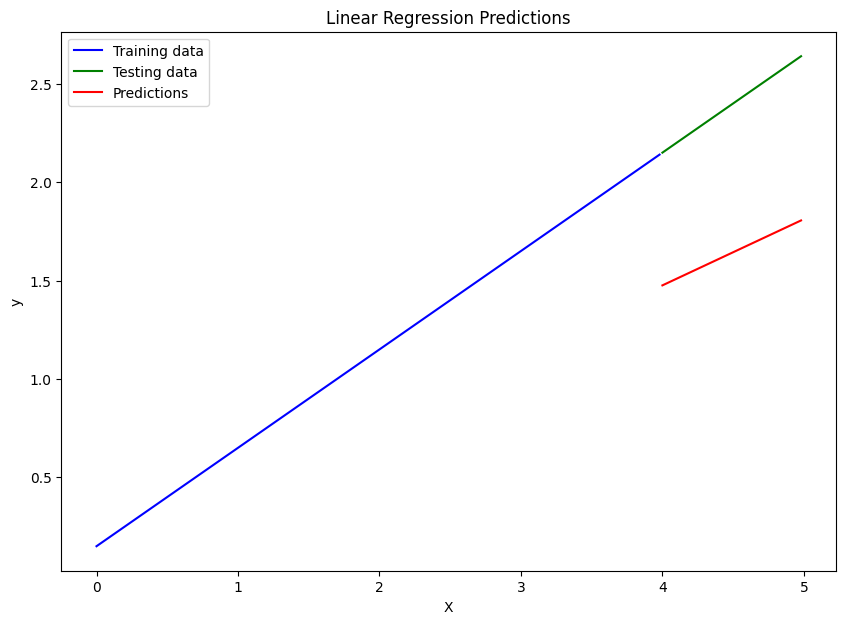

In [12]:
plot_predictions(X_train, y_train, X_test, y_test,y_preds)

In [13]:
### Step 5: Calculate loss
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [14]:
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Training the model
    y_predict = model(X_train)

    # Calculate the loss
    loss = loss_func(y_predict, y_train)
    print(f"Loss: {loss}")

    # To optimize the model, we are setting the gradient descent to 0.
    optimizer.zero_grad()

    #printing the value of weights and bias
    print(f"{model.state_dict()}")

    # backward propagation 
    loss.backward()

    # optimizer step
    optimizer.step()

    # now, evaluating the model
    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_func(test_pred,y_test)

        if epoch %10 ==0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Loss: {loss}, Test loss: {test_loss}, weight: {model.weight}, bias: {model.bias}")


Loss: 0.34617674350738525
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss: 0.34617674350738525, Test loss: 0.6550998687744141, weight: Parameter containing:
tensor([0.3566], requires_grad=True), bias: Parameter containing:
tensor([0.1388], requires_grad=True)
Loss: 0.29657572507858276
OrderedDict([('weight', tensor([0.3566])), ('bias', tensor([0.1388]))])
Loss: 0.24697473645210266
OrderedDict([('weight', tensor([0.3765])), ('bias', tensor([0.1488]))])
Loss: 0.19760702550411224
OrderedDict([('weight', tensor([0.3964])), ('bias', tensor([0.1588]))])
Loss: 0.1494055688381195
OrderedDict([('weight', tensor([0.4163])), ('bias', tensor([0.1683]))])
Loss: 0.10306256264448166
OrderedDict([('weight', tensor([0.4361])), ('bias', tensor([0.1772]))])
Loss: 0.060610391199588776
OrderedDict([('weight', tensor([0.4555])), ('bias', tensor([0.1850]))])
Loss: 0.027328919619321823
OrderedDict([('weight', tensor([0.4738])), ('bias', tensor([0.1910]))])
Loss: 0.0192263443022966

In [ ]:
# plot_predictions(X_train, y_train, X_test, y_test,y_predict) 
# getting error cause y_predict is not a numpy array.

y_predict = model(X_test).detach().numpy()



y_predict.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50, 1),
 torch.Size([200, 1]),
 torch.Size([200, 1]),
 torch.Size([50, 1]),
 torch.Size([50, 1]))

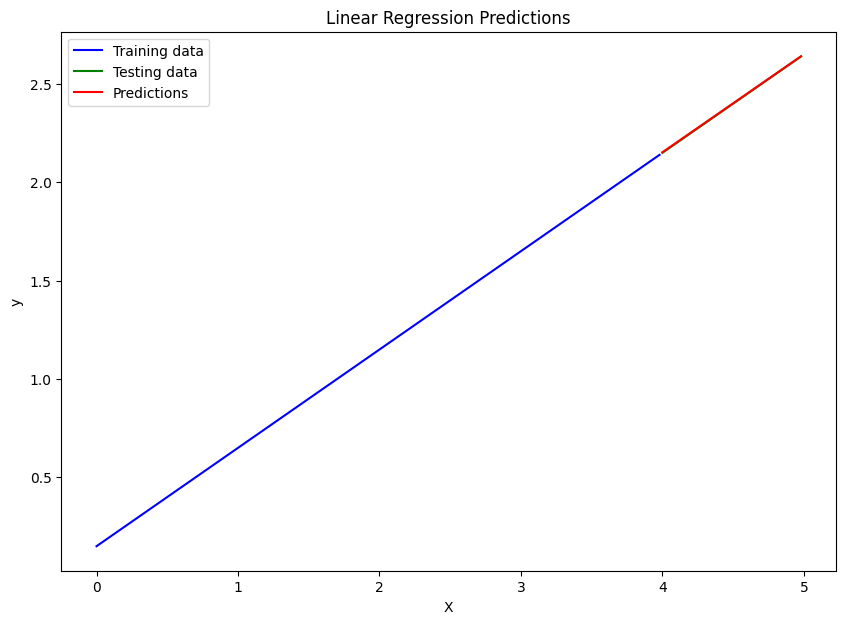

In [17]:
plot_predictions(X_train, y_train, X_test, y_test,y_predict) 

In [21]:
loss_values = np.array(torch.tensor(loss_values).detach().numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).detach().numpy())
epoch_count, loss_values,test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 array([0.34617674, 0.02012303, 0.01194859, 0.00933061, 0.0070675 ,
        0.00646352, 0.00646352, 0.00646352, 0.00646352, 0.00646352],
       dtype=float32),
 array([0.65509987, 0.10144714, 0.09602161, 0.09413954, 0.09660754,
        0.09721657, 0.09721657, 0.09721657, 0.09721657, 0.09721657],
       dtype=float32))

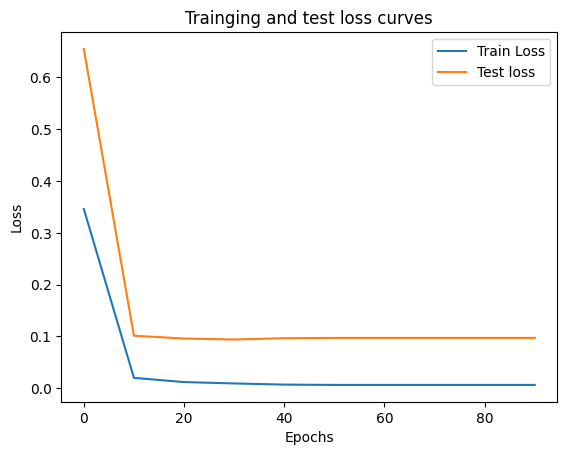

In [24]:
# plot the loss curves

# epoch_count, loss_values, test_loss_values
plt.plot(epoch_count,loss_values, label="Train Loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.legend()
plt.title("Trainging and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()